In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [2]:
sns.set_style('dark')
import matplotlib as mpl

mpl.style.use(['https://gist.githubusercontent.com/BrendanMartin/01e71bb9550774e2ccff3af7574c0020/raw/6fa9681c7d0232d34c9271de9be150e584e606fe/lds_default.mplstyle'])
mpl.rcParams.update({"figure.figsize": (8,6), "axes.titlepad": 22.0})


In [12]:
# print(dataset)

In [5]:
print('Target variables : ',dataset['target_names'])

(unique,counts) = np.unique(dataset['target'],return_counts=True)
print('Unique values of the target variable',unique)
print('Counts of the target variable :',counts)

Target variables :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


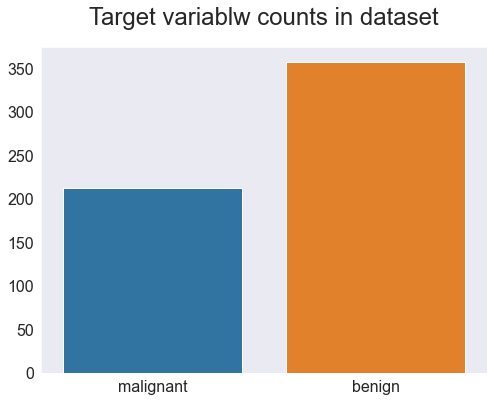

In [6]:
sns.barplot(x=dataset['target_names'],y=counts)
plt.title('Target variablw counts in dataset')
plt.show()

In [17]:
X = dataset['data']
y=dataset['target']

In [18]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
TN,FP,FN,TP = confusion_matrix(y_test,predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))


True Positive(TP)  =  84
False Positive(FP) =  2
True Negative(TN)  =  51
False Negative(FN) =  6
Accuracy of the binary classification = 0.944


# Other Binary Classifications

In [24]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [26]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.944056,0.933333,0.976744
Support Vector Machines,0.951049,0.977778,0.946237
Decision Trees,0.881119,0.855556,0.950617
Random Forest,0.972028,0.966667,0.988636
Naive Bayes,0.937063,0.955556,0.945055
K-Nearest Neighbor,0.937063,0.944444,0.955056
